In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

In [138]:
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import normalize

In [6]:
conn = sqlite3.connect("../amazon-fine-food-review/final_2.sqlite")
d_f = pd.read_sql_query("SELECT * FROM Reviews",conn)

In [117]:
x = d_f["Cleaned_text"]
y = d_f["Score"]

In [118]:
x_train , x_test , y_train , y_test = train_test_split(x, y ,test_size = 0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3490,)
(1496,)
(3490,)
(1496,)


In [119]:
#### vectorizing using count vectorizer

model = CountVectorizer(min_df = 5)
x_train = model.fit_transform(x_train)
x_test = model.transform(x_test)

In [120]:
print(x_train.shape)
print(x_test.shape)

(3490, 2902)
(1496, 2902)


In [42]:
##### using SGDClassifier for hinge loss

clf_model = SGDClassifier(loss = 'hinge')                   ### it is more efficient then SVMCLassiier
caliberated_model = CalibratedClassifierCV(base_estimator = clf_model , cv= 10 )     ### this will caliberate the parameters of classifief automatically
caliberated_model.fit(x_train , y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(), cv=10)

In [43]:
predicted_y = caliberated_model.predict(x_test)

In [44]:
roc_score = roc_auc_score(y_test , predicted_y)
print("ROC auc score is %f" %(roc_score))

ROC auc score is 0.691333


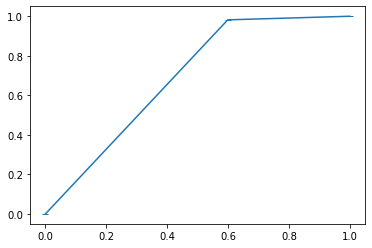

In [45]:
roc_fpr , roc_tpr ,_= roc_curve(y_test , predicted_y)
plt.plot(roc_fpr , roc_tpr , marker = '_' ,label = 'logistic')

In [28]:
print(np.count_nonzero(predicted_y==0))
print(np.count_nonzero(predicted_y==1))

83
1413


In [64]:
print(x_train.shape)
print(x_test.shape)

(3490, 2905)
(1496, 2905)


In [70]:
x_train[0]

<1x2905 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

ROC AUC score is 0.779449


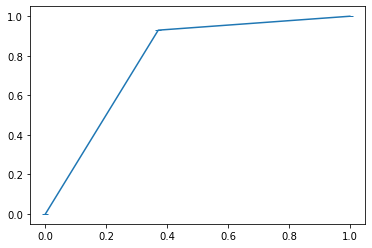

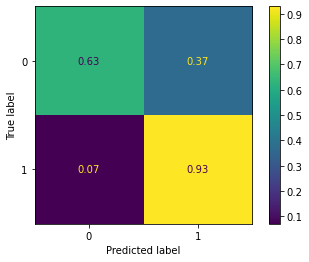

In [77]:
### performing kernel svc on bow

clf_model = SVC(kernel = 'linear' , C = 1 )
clf_model.fit(x_train , y_train)
predicted_y = clf_model.predict(x_test)
roc_score = roc_auc_score(y_test , predicted_y)
print("ROC AUC score is %f"%(roc_score))
roc_fpr , roc_tpr,_ = roc_curve(y_test , predicted_y)
plt.plot(roc_fpr , roc_tpr , marker = "_" )
plot_confusion_matrix(clf_model , x_test , y_test , normalize = 'true')

In [72]:
print(np.count_nonzero(predicted_y==0))
print(np.count_nonzero(predicted_y==1))

235
1261


ROC AUC score is 0.782178


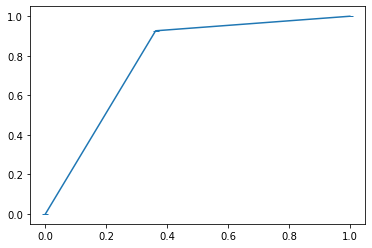

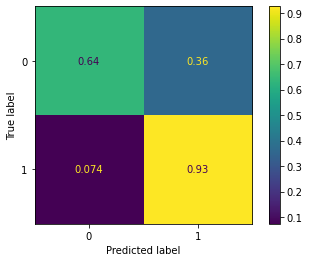

In [78]:
### performing kernel svc on bow at C==10

clf_model = SVC(kernel = 'linear' , C = 10 )
clf_model.fit(x_train , y_train)
predicted_y = clf_model.predict(x_test)
roc_score = roc_auc_score(y_test , predicted_y)
print("ROC AUC score is %f"%(roc_score))
roc_fpr , roc_tpr,_ = roc_curve(y_test , predicted_y)
plt.plot(roc_fpr , roc_tpr , marker = "_" )
plot_confusion_matrix(clf_model , x_test , y_test , normalize = 'true')

ROC AUC score is 0.758416


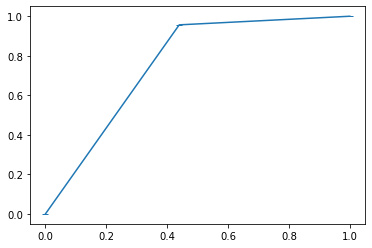

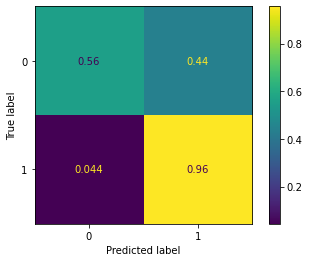

In [79]:
### performing kernel svc on bow C = = 0.1

clf_model = SVC(kernel = 'linear' , C = 0.1 )
clf_model.fit(x_train , y_train)
predicted_y = clf_model.predict(x_test)
roc_score = roc_auc_score(y_test , predicted_y)
print("ROC AUC score is %f"%(roc_score))
roc_fpr , roc_tpr,_ = roc_curve(y_test , predicted_y)
plt.plot(roc_fpr , roc_tpr , marker = "_" )
plot_confusion_matrix(clf_model , x_test , y_test , normalize = 'true')

In [90]:
### performing grid search for best C on linear kernel and finding optimal C

c_list = [0.1 , 1 , 10 ,100 ]
roc = []
for i in c_list:
    clf_model = SVC(kernel = 'linear' , C = i )
    clf_model.fit(x_train , y_train)
    predicted_y = clf_model.predict(x_test)
    roc_score = roc_auc_score(y_test , predicted_y)
    roc.append(roc_score)
    ##roc_fpr , roc_tpr,_ = roc_curve(y_test , predicted_y)
    ##plt.plot(roc_fpr , roc_tpr , marker = "_" )
    ##plot_confusion_matrix(clf_model , x_test , y_test , normalize = 'true')
    

Text(0, 0.5, 'roc values')

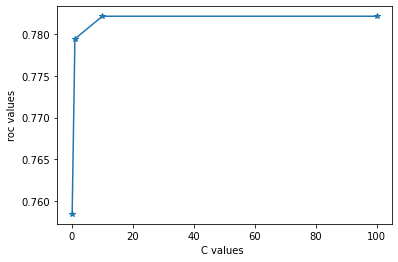

In [91]:
plt.plot(c_list , roc , label = "optimal_C" ,marker = "*")
plt.xlabel("C values ")
plt.ylabel("roc values")

In [100]:
for i in range(1,len(roc)):
    if(roc[i]>roc[i-1]):
        optimal_c = i
    

ROC auc value 0.782178


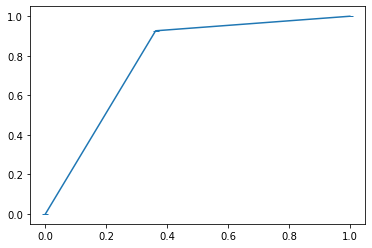

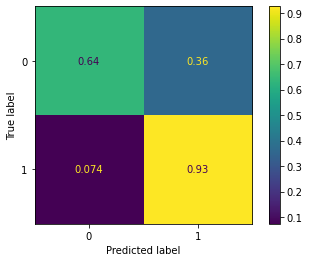

In [103]:
### as we can see tha tthe auc value at c = 10 is maximum so we should train our model on c = 10

clf_model = SVC(C = c_list[optimal_c] , kernel = 'linear')
clf_model.fit(x_train , y_train)
predicted_y = clf_model.predict(x_test)
roc_score = roc_auc_score(y_test , predicted_y)
print("ROC auc value %f"%(roc_score))
roc_fpr , roc_tpr,_ = roc_curve(y_test , predicted_y)
plt.plot(roc_fpr , roc_tpr , marker = "_" )
plot_confusion_matrix(clf_model , x_test , y_test , normalize = 'true')

In [109]:
### now performing rbf kernel
roc_scores = []
gama_list = [0.01 , 0.1 , 1 , 10]
c_list = [0.1 , 1, 10]
for i in c_list:
    rows = []
    for j in gama_list:
        clf_model = SVC(kernel = 'rbf' ,C = i , gamma = j)
        clf_model.fit(x_train , y_train)
        predicted_cv = clf_model.predict(x_cv)
        score = roc_auc_score(y_cv , predicted_cv)
        rows.append(score)
        
    roc_scores.append(rows)

In [122]:
### GridSearchCV()
tuned_parameters = [{'kernel':["rbf"] , "C":[1,10,100] , "gamma":[1e-3, 1e-4]}]
clf_model = GridSearchCV(SVC(),tuned_parameters , cv = 3)
clf_model.fit(x_train , y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [123]:
clf_model.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

ROC AUC score is 0.727016 


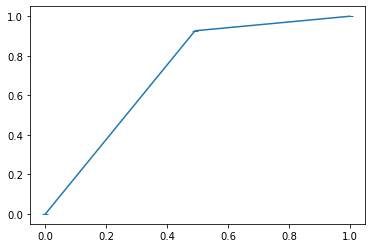

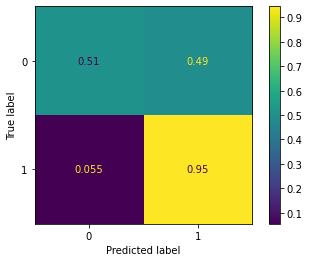

In [127]:
clf_model = SVC(C= 100 , kernel = 'rbf' , gamma = 0.001)
clf_model.fit(x_train,y_train)
predicted_y = clf_model.predict(x_test)
score = roc_auc_score(y_test , predicted_y)
roc_fpr , roc_trf , _ = roc_curve(y_test , predicted_y)
plt.plot(roc_fpr , roc_tpr , marker = "_" , label = "dfd")
plot_confusion_matrix(clf_model , x_test , y_test , normalize = 'true')
print("ROC AUC score is %f " %(score))

In [128]:
print(np.count_nonzero(predicted_y == 0))
print(np.count_nonzero(predicted_y == 1))

187
1309


In [134]:
##### TFIDFVECTORIZER

x = d_f["Cleaned_text"]
y = d_f["Score"]
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3490,)
(1496,)
(3490,)
(1496,)


In [136]:
model = TfidfVectorizer(encoding = 'utf-8' , min_df = 5 )
x_train = model.fit_transform(x_train)
x_test = model.transform(x_test)

In [139]:
### normalize

x_train = normalize(x_train , axis = 1 , norm = 'l2')
x_test = normalize(x_test , axis = 1 , norm = 'l2')

In [141]:
## performing gridsearchcv for c on svc
tuned_parameters = [{'kernel':['linear'], 'C' : [1,10,100]}]
clf_model = GridSearchCV(SVC(),tuned_parameters, cv = 3)
clf_model.fit(x_train , y_train)


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']}])

In [144]:
clf_model.best_params_

{'C': 1, 'kernel': 'linear'}

score is 0.713499


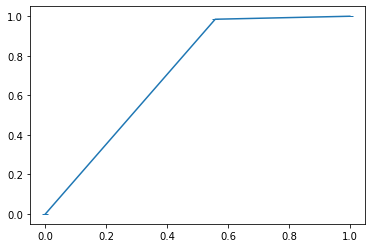

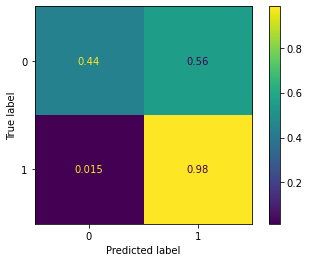

In [149]:
clf_model = SVC(kernel = "linear" , C=1 )
clf_model.fit(x_train , y_train)
predicted_y = clf_model.predict(x_test)
score = roc_auc_score(y_test ,predicted_y)
print("score is %f" %(score))
roc_fpr , roc_tpr , _ = roc_curve(y_test , predicted_y)
plt.plot(roc_fpr , roc_tpr , marker = "_")
plot_confusion_matrix(clf_model , x_test ,y_test ,normalize = 'true')